In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sum_matrix(A,B):
    
    # Define a variável L como o número de linhas e coluna dos inputs.
    n= A.shape[0]

    # Verifica se as matrizes possuem o mesmo tamanho.
    if A.shape != B.shape:
        #Retorna uma mensagem de erro caso as matrizes A e B não possuam o mesmo tamanho.
        raise ValueError('As matrizes não podem ser somadas pois possuem dimenções diferentes')   
        
        # Cria a C para armazenar a somas entre os elementos das matrizes A e B. 
    C= np.zeros((A.shape[0],B.shape[1]))
        
    inicio= time.time()

        # Itera sobre as linhas e colunas das matrizes A e B.
    for i in range(n):
        for j in range(n):
                
            # Armazena o resultado da soma dos elementos das matrizes A e B na matriz C.
            C[i,j]= A[i,j]+B[i,j]
    fim = time.time()


    total = fim - inicio

    return total

def mult_matrix(A, B):

    # Define o tamanho da linha da matriz A
    LA = A.shape[0]

    # Define o tamanho da coluna da matriz B
    CB = B.shape[1]

    # Verifica se o tamanho da linha da matriz A é igual ao tamanho da coluna da matriz B
    if A.shape[1] != B.shape[0]:
        raise ValueError('As matrizes não podem ser multiplicadas pois possuem dimenções diferentes')

    # Cria uma Matriz C cujo tamanho da linha é o mesmo da matriz A e o tamanho da coluna é o mesmo da matriz B
    C = np.zeros((LA, CB))

    # Multiplica os elementos das matrizes A e B e armazena na matriz C
    tempo_inicial= time.time()
    for l in range(LA):  # Itera sobre linhas de A
        for c in range(CB):  # Itera sobre colunas de B
            for p in range(CB):  # Itera sobre elementos em uma linha de A
                C[l,c]+= A[l,p] * B[p,c]
                tempo_final= time.time()
    tempo_total= tempo_final - tempo_inicial
                

    return tempo_total

In [3]:
tempo_de_execução= {'Tamanho_da_Matrix':[],
                    'Tempo_de_execução_soma':[],
                    'Tempo_de_execução_Mult_sqrt':[],
                    'Tempo_de_execução_Mult_Non_sqrt':[],
                    }

for i in range(5):
    n= 2**i
    matrix_a= np.random.randint(0,10,size=(3**i,3**i))
    matrix_b=np.random.randint(0,10,size=(3**i,3**i))
    matrix_c=np.random.randint(0,10,size=(3**i,2**i))
    tempo_de_execução['Tamanho_da_Matrix'].append(n)
    tempo_de_execução['Tempo_de_execução_Mult_sqrt'].append(mult_matrix(matrix_a,matrix_b))
    tempo_de_execução['Tempo_de_execução_Mult_Non_sqrt'].append(mult_matrix(matrix_a,matrix_c))
    tempo_de_execução['Tempo_de_execução_soma'].append(sum_matrix(matrix_a,matrix_b))


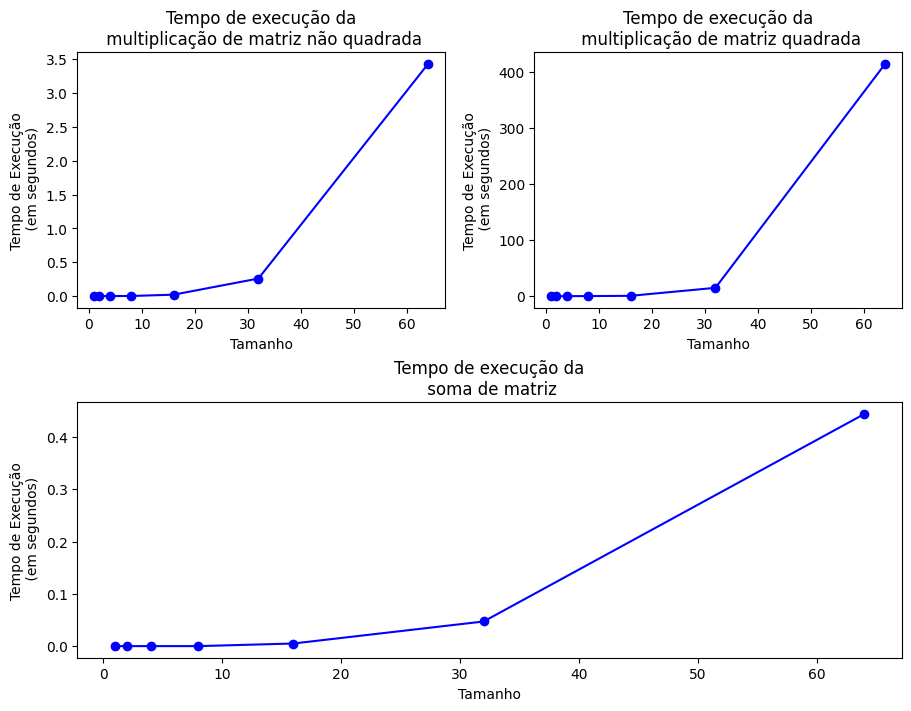

In [4]:
fig= plt.figure(figsize=(9,7), layout= 'constrained')
axs= fig.subplot_mosaic([['Multiplicação_Non_sqrt','Multiplicação sqrt'],['Soma','Soma']])


#plot dos gráficos de soma e multiplicação
axs['Soma'].set_title('Tempo de execução da\n soma de matriz')
axs['Soma'].plot(tempo_de_execução['Tamanho_da_Matrix'], tempo_de_execução['Tempo_de_execução_soma'], label="Soma", marker='o', color='b')
axs['Soma'].set_xlabel("Tamanho")
axs["Soma"].set_ylabel("Tempo de Execução\n (em segundos)")

axs['Multiplicação sqrt'].set_title('Tempo de execução da\n multiplicação de matriz quadrada')
axs['Multiplicação sqrt'].plot(tempo_de_execução['Tamanho_da_Matrix'], tempo_de_execução['Tempo_de_execução_Mult_sqrt'], label="multiplicação", marker='o', color='b')
axs['Multiplicação sqrt'].set_xlabel("Tamanho")
axs['Multiplicação sqrt'].set_ylabel("Tempo de Execução\n (em segundos)")

axs['Multiplicação_Non_sqrt'].set_title('Tempo de execução da\n multiplicação de matriz não quadrada')
axs['Multiplicação_Non_sqrt'].plot(tempo_de_execução['Tamanho_da_Matrix'], tempo_de_execução['Tempo_de_execução_Mult_Non_sqrt'], label="multiplicação", marker='o', color='b')
axs['Multiplicação_Non_sqrt'].set_xlabel("Tamanho")
axs['Multiplicação_Non_sqrt'].set_ylabel("Tempo de Execução\n (em segundos)")



plt.show()

In [5]:
df= pd.DataFrame(tempo_de_execução)

In [6]:
# df['variação1']=df.Tempo_de_execução_soma.pct_change()

In [7]:
df.insert(2,'variação1',df.Tempo_de_execução_soma.pct_change())
df.insert(4,'variação2',df.Tempo_de_execução_Mult_sqrt.pct_change())

In [8]:
df

,Tamanho_da_Matrix,Tempo_de_execução_soma,variação1,Tempo_de_execução_Mult_sqrt,variação2,Tempo_de_execução_Mult_Non_sqrt
0,1,0.000000,NaN,0.000000,NaN,0.000000
1,2,0.000000,NaN,0.000000,NaN,0.000000
2,4,0.000000,NaN,0.002403,inf,0.001004
3,8,0.000000,NaN,0.029386,11.228892,0.001999
4,16,0.004997,inf,0.558639,18.010198,0.021438
5,32,0.047098,8.425756,14.786370,25.468558,0.259906
6,64,0.443712,8.420957,413.612581,26.972557,3.429980
